<a href="https://colab.research.google.com/github/satani99/practical_deep_learning_for_coders/blob/main/fast_ai_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [2]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [3]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_9.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_59.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_134.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_67.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_271.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_37.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_160.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_150.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_254.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_13.jpg')...]

In [4]:
fname = (path/'images').ls()[0]

In [5]:
print(fname)
import re

/root/.fastai/data/oxford-iiit-pet/images/boxer_9.jpg


In [6]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['boxer']

In [7]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders(path/'images')

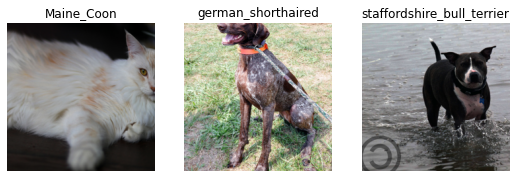

In [8]:
dls.show_batch(nrows=1, ncols=3)

In [9]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.649067,0.375481,0.876861,01:07


epoch,train_loss,valid_loss,accuracy,time
0,0.538331,0.333318,0.896482,01:06
1,0.361838,0.270386,0.907307,01:06


In [10]:
x, y = dls.one_batch()

In [11]:
y

TensorCategory([ 7, 10, 23, 30, 12,  0,  3, 35, 17,  8, 22, 12, 34, 22, 33, 26,
                 9,  5,  4, 30, 17, 13, 35,  0, 29,  5, 12, 35, 28, 12, 31,  9,
                17, 27, 16, 10, 18, 18, 21, 20, 21, 11, 17,  9, 20, 19, 13, 25,
                 7, 14, 25, 31,  1, 19, 35, 25,  0, 19, 33, 14,  8, 17, 17, 23],
               device='cuda:0')

In [12]:
preds, _ = learn.get_preds(dl=[(x, y)])
preds[0]

TensorBase([7.1277e-07, 9.7274e-07, 8.0164e-06, 7.7698e-07, 1.9098e-04,
            1.3780e-06, 1.3161e-04, 9.9751e-01, 2.1292e-03, 7.5317e-08,
            2.5028e-08, 2.4668e-07, 1.3969e-06, 3.0375e-09, 7.7016e-08,
            1.4229e-07, 5.3619e-08, 2.6621e-09, 3.5749e-09, 6.6228e-08,
            2.5276e-07, 3.0020e-06, 6.7811e-06, 1.1748e-05, 7.4028e-08,
            5.2315e-08, 9.3107e-09, 1.9468e-06, 1.8600e-07, 6.5937e-07,
            8.3300e-09, 3.8893e-06, 8.9175e-08, 9.3952e-08, 1.2571e-08,
            9.9502e-08, 4.8474e-08])

In [13]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.))

In [14]:
acts = torch.randn((6, 2))*2
acts

tensor([[-1.1590,  0.4517],
        [ 2.2823,  0.2790],
        [-2.9664,  0.5550],
        [-0.7854,  1.0817],
        [-1.3176,  0.3735],
        [ 2.9759,  0.3029]])

In [15]:
acts.sigmoid()

tensor([[0.2389, 0.6110],
        [0.9074, 0.5693],
        [0.0490, 0.6353],
        [0.3132, 0.7468],
        [0.2112, 0.5923],
        [0.9515, 0.5752]])

In [16]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.1665, 0.8811, 0.0287, 0.1339, 0.1556, 0.9354])

In [17]:
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [29]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.1665, 0.8335],
        [0.8811, 0.1189],
        [0.0287, 0.9713],
        [0.1339, 0.8661],
        [0.1556, 0.8444],
        [0.9354, 0.0646]])

In [30]:
def mnist(inputs, targets):
  inputs = inputs.sigmoid()
  return torch.where(targets==1, 1-inputs, inputs).mean()

In [31]:
targ = tensor([0, 1, 0, 1, 1, 0])

In [32]:
sm_acts

tensor([[0.1665, 0.8335],
        [0.8811, 0.1189],
        [0.0287, 0.9713],
        [0.1339, 0.8661],
        [0.1556, 0.8444],
        [0.9354, 0.0646]])

In [33]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.1665, 0.1189, 0.0287, 0.8661, 0.8444, 0.9354])

In [34]:
-sm_acts[idx, targ]

tensor([-0.1665, -0.1189, -0.0287, -0.8661, -0.8444, -0.9354])

In [35]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.1665, -0.1189, -0.0287, -0.8661, -0.8444, -0.9354])

In [36]:
loss_func = nn.CrossEntropyLoss()

In [37]:
loss_func(acts, targ)

tensor(1.3088)

In [38]:
F.cross_entropy(acts, targ)

tensor(1.3088)

In [39]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([1.7928, 2.1298, 3.5506, 0.1437, 0.1692, 0.0668])

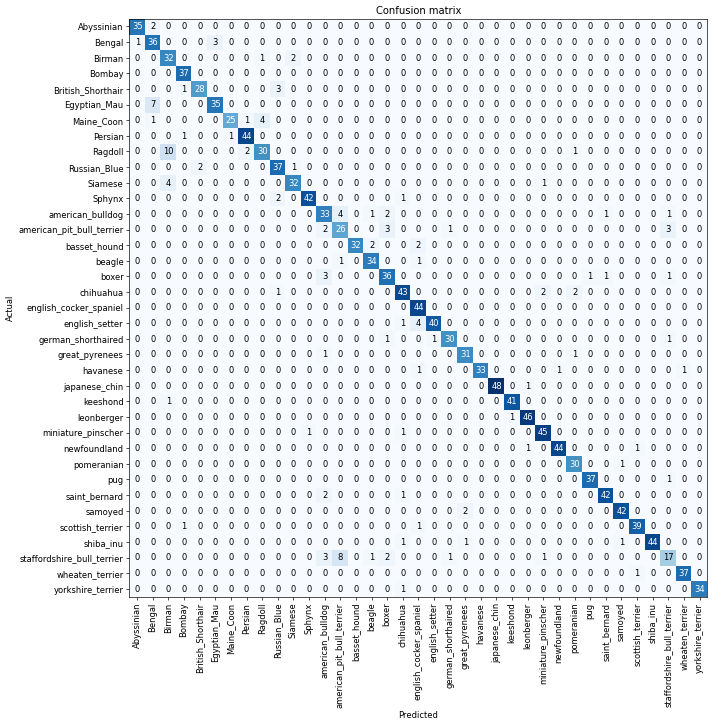

In [40]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [41]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 10),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 8),
 ('Egyptian_Mau', 'Bengal', 7)]

In [42]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.573362,4.010930,0.511502,01:08


epoch,train_loss,valid_loss,error_rate,time
0,3.873199,3.306029,0.702300,01:11


/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


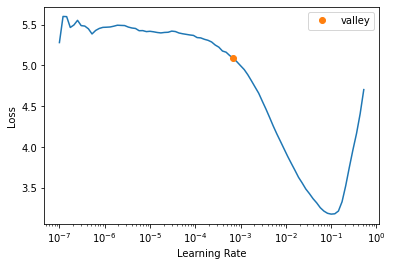

In [46]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min = learn.lr_find()

In [51]:
print(f"Minimum/10: {lr_min}")

Minimum/10: SuggestedLRs(valley=0.0006918309954926372)


In [52]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.294824,0.308643,0.109608,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.535423,0.325552,0.094046,01:10
1,0.340857,0.232218,0.075778,01:11
